In [1]:
1+1

2

# Dialogue Time Length

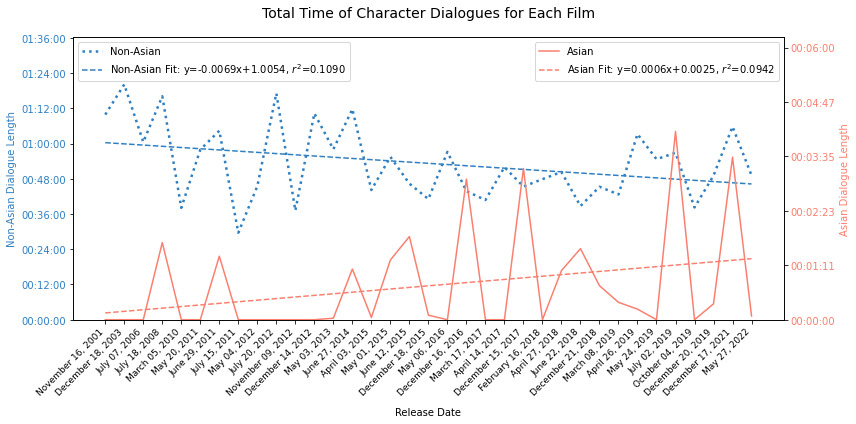

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel('Total Time of Dialogues.xlsx')
df['Time'] = pd.to_datetime(df['Time'], format='%B %d, %Y')

def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

# Apply the function to convert time to seconds
df['Asian'] = df['Asian'].apply(time_to_seconds)
df['Non-Asian'] = df['Non-Asian'].apply(time_to_seconds)

# Make sure your df is sorted by Year
df = df.sort_values('Time')

# Convert dialogue length from seconds to hours
df['Asian'] /= 3600
df['Non-Asian'] /= 3600


# 假设'date'列是你的日期数据，'value1'和'value2'列是你的两个值
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)

def hms_formatter(x, pos):
    h = int(x)
    m = int((x - h)*60)
    s = int(((x - h)*60 - m)*60)
    return f"{h:02d}:{m:02d}:{s:02d}"

# Create the formatter
formatter = FuncFormatter(hms_formatter)

# Your x-axis values will now be an array of integers from 0 to the length of your dataframe
x_values = np.arange(len(df))

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(fontsize=9)

# left y-axis
non_asian_line, = ax1.plot(x_values, df['Non-Asian'], label='Non-Asian', color='#2f7fc1', linestyle=':', linewidth=2.5)
ax1.set_xlabel('Release Date', labelpad=10)
ax1.set_ylabel('Non-Asian Dialogue Length', color='#2f7fc1')
ax1.yaxis.set_major_formatter(formatter)
ax1.tick_params(axis='y', labelcolor='#2f7fc1')

# right y-axis
ax2 = ax1.twinx()
asian_line, = ax2.plot(x_values, df['Asian'], label='Asian', color='#fa7f6f')
ax2.set_ylabel('Asian Dialogue Length', color='#fa7f6f')
ax2.yaxis.set_major_formatter(formatter)
ax2.tick_params(axis='y', labelcolor='#fa7f6f')


# Perform linear regression on the data
non_asian_slope, non_asian_intercept, non_asian_r_value, _, _ = stats.linregress(x_values, df['Non-Asian'])
asian_slope, asian_intercept, asian_r_value, _, _ = stats.linregress(x_values, df['Asian'])

# Draw the linear regression line on the graph
non_asian_line = ax1.plot(x_values, non_asian_slope*x_values + non_asian_intercept, label=f'Non-Asian Fit: y={non_asian_slope:.4f}x+{non_asian_intercept:.4f}, $r^2$={non_asian_r_value**2:.4f}', color='#2f7fc1', linestyle='--')
asian_line = ax2.plot(x_values, asian_slope*x_values + asian_intercept, label=f'Asian Fit: y={asian_slope:.4f}x+{asian_intercept:.4f}, $r^2$={asian_r_value**2:.4f}', color='#fa7f6f', linestyle='--')

# Add Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Determine the range for the dialogue length
non_asian_range = (0, df['Non-Asian'].max() * 1.2)
asian_range = (0, df['Asian'].max() * 1.5)

# Set the range for the y-axis
ax1.set_ylim(non_asian_range)
ax2.set_ylim(asian_range)

# Now, set your x-ticks and x-ticklabels to be the index and date
ax1.set_xticks(x_values)
ax1.set_xticklabels(df['Time'].dt.strftime('%B %d, %Y'), rotation=45, ha='right')

# Add a title
plt.title('Total Time of Character Dialogues for Each Film', pad=20, fontsize=14)

# Show the plot
plt.tight_layout()

plt.savefig("Length_Total Time of Character Dialogues for Each Film.png")

plt.show()

## Token

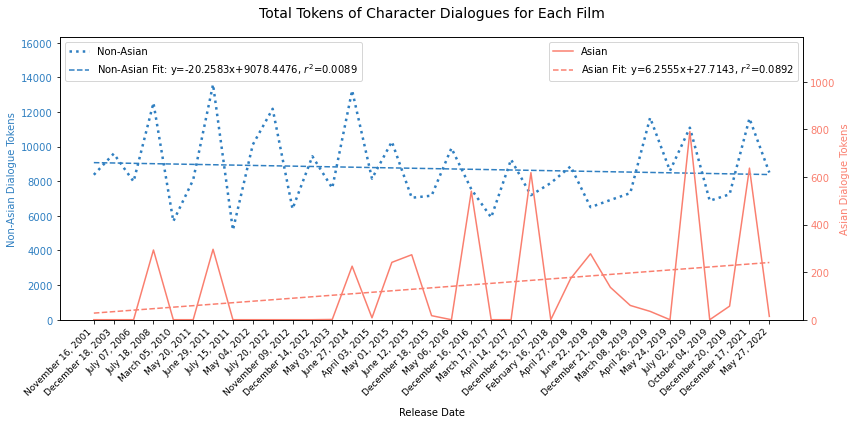

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel('Token.xlsx')
df['Time'] = pd.to_datetime(df['Time'], format='%B %d, %Y')

# Make sure your df is sorted by Time
df = df.sort_values('Time')

# Your x-axis values will now be an array of integers from 0 to the length of your dataframe
x_values = np.arange(len(df))

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(fontsize=9)

# left y-axis
non_asian_line, = ax1.plot(x_values, df['Non-Asian'], label='Non-Asian', color='#2f7fc1', linestyle=':', linewidth=2.5)
ax1.set_xlabel('Release Date', labelpad=10)
ax1.set_ylabel('Non-Asian Dialogue Tokens', color='#2f7fc1')
ax1.tick_params(axis='y', labelcolor='#2f7fc1')

# right y-axis
ax2 = ax1.twinx()
asian_line, = ax2.plot(x_values, df['Asian'], label='Asian', color='#fa7f6f')
ax2.set_ylabel('Asian Dialogue Tokens', color='#fa7f6f')
ax2.tick_params(axis='y', labelcolor='#fa7f6f')

# Performing linear regression on the data
non_asian_slope, non_asian_intercept, non_asian_r_value, _, _ = stats.linregress(x_values, df['Non-Asian'])
asian_slope, asian_intercept, asian_r_value, _, _ = stats.linregress(x_values, df['Asian'])

# Plotting the linear regression lines on the graph
non_asian_line = ax1.plot(x_values, non_asian_slope*x_values + non_asian_intercept, label=f'Non-Asian Fit: y={non_asian_slope:.4f}x+{non_asian_intercept:.4f}, $r^2$={non_asian_r_value**2:.4f}', color='#2f7fc1', linestyle='--')
asian_line = ax2.plot(x_values, asian_slope*x_values + asian_intercept, label=f'Asian Fit: y={asian_slope:.4f}x+{asian_intercept:.4f}, $r^2$={asian_r_value**2:.4f}', color='#fa7f6f', linestyle='--')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Determine the range for the dialogue length
non_asian_range = (0, df['Non-Asian'].max() * 1.2)
asian_range = (0, df['Asian'].max() * 1.5)

# Set the range for the y-axis
ax1.set_ylim(non_asian_range)
ax2.set_ylim(asian_range)

# Now, set your x-ticks and x-ticklabels to be the index and date
ax1.set_xticks(x_values)
ax1.set_xticklabels(df['Time'].dt.strftime('%B %d, %Y'), rotation=45, ha='right')

# Add a title
plt.title('Total Tokens of Character Dialogues for Each Film', pad=20, fontsize=14)

# Show the plot
plt.tight_layout()

plt.savefig("Token_Total Tokens of Character Dialogues for Each Film.png")

plt.show()


In [4]:
import matplotlib
print(matplotlib.__version__)

3.5.1


In [5]:
import pandas as pd
print(pd.__version__)

1.4.2


In [6]:
import numpy as np
print(np.__version__)

1.21.5


In [7]:
import scipy
print(scipy.__version__)

1.7.3


# Average value

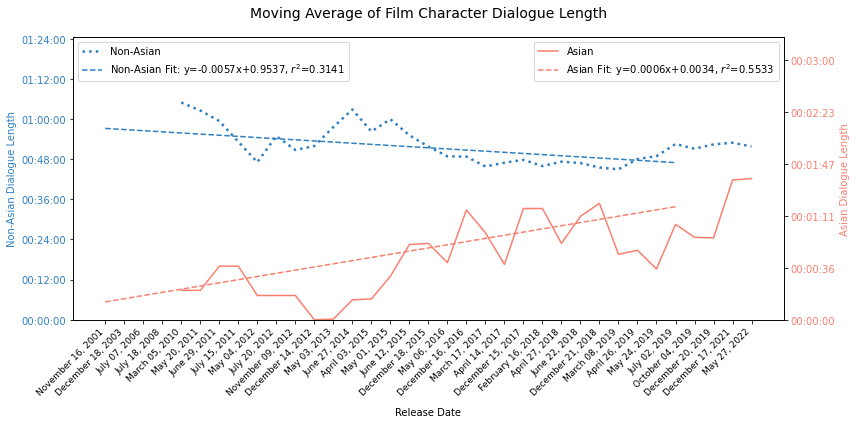

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel('Total Time of Dialogues.xlsx')
df['Time'] = pd.to_datetime(df['Time'], format='%B %d, %Y')

def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

# Apply the function to convert time to seconds
df['Asian'] = df['Asian'].apply(time_to_seconds)
df['Non-Asian'] = df['Non-Asian'].apply(time_to_seconds)

# Make sure your df is sorted by Year
df = df.sort_values('Time')

# Convert dialogue length from seconds to hours
df['Asian'] /= 3600
df['Non-Asian'] /= 3600

# Compute moving averages over a window of 3
df['Asian_avg'] = df['Asian'].rolling(window=5).mean()
df['Non-Asian_avg'] = df['Non-Asian'].rolling(window=5).mean()

def hms_formatter(x, pos):
    h = int(x)
    m = int((x - h)*60)
    s = int(((x - h)*60 - m)*60)
    return f"{h:02d}:{m:02d}:{s:02d}"

# Create the formatter
formatter = FuncFormatter(hms_formatter)

# Your x-axis values will now be an array of integers from 0 to the length of your dataframe
x_values = np.arange(len(df))

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(fontsize=9)

# left y-axis
non_asian_line, = ax1.plot(x_values, df['Non-Asian_avg'], label='Non-Asian', color='#2f7fc1', linestyle=':', linewidth=2.5)
ax1.set_xlabel('Release Date', labelpad=10)
ax1.set_ylabel('Non-Asian Dialogue Length', color='#2f7fc1')
ax1.yaxis.set_major_formatter(formatter)
ax1.tick_params(axis='y', labelcolor='#2f7fc1')

# right y-axis
ax2 = ax1.twinx()
asian_line, = ax2.plot(x_values, df['Asian_avg'], label='Asian', color='#fa7f6f')
ax2.set_ylabel('Asian Dialogue Length', color='#fa7f6f')
ax2.yaxis.set_major_formatter(formatter)
ax2.tick_params(axis='y', labelcolor='#fa7f6f')

# Removing NaN values for the linear regression
df_non_asian_avg_no_na = df['Non-Asian_avg'].dropna()
df_asian_avg_no_na = df['Asian_avg'].dropna()

x_values_non_asian_avg_no_na = np.arange(len(df_non_asian_avg_no_na))
x_values_asian_avg_no_na = np.arange(len(df_asian_avg_no_na))

# 对数据进行线性回归
non_asian_slope, non_asian_intercept, non_asian_r_value, _, _ = stats.linregress(x_values_non_asian_avg_no_na, df_non_asian_avg_no_na)
asian_slope, asian_intercept, asian_r_value, _, _ = stats.linregress(x_values_asian_avg_no_na, df_asian_avg_no_na)

# 在图上画出线性回归线
ax1.plot(x_values_non_asian_avg_no_na, non_asian_slope*x_values_non_asian_avg_no_na + non_asian_intercept, label=f'Non-Asian Fit: y={non_asian_slope:.4f}x+{non_asian_intercept:.4f}, $r^2$={non_asian_r_value**2:.4f}', color='#2f7fc1', linestyle='--')
ax2.plot(x_values_asian_avg_no_na, asian_slope*x_values_asian_avg_no_na + asian_intercept, label=f'Asian Fit: y={asian_slope:.4f}x+{asian_intercept:.4f}, $r^2$={asian_r_value**2:.4f}', color='#fa7f6f', linestyle='--')

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Determine the range for the dialogue length
non_asian_range = (0, df['Non-Asian_avg'].max() * 1.3)
asian_range = (0, df['Asian_avg'].max() * 2.0)  # I have updated the range here

# Set the range for the y-axis
ax1.set_ylim(non_asian_range)
ax2.set_ylim(asian_range)

# Now, set your x-ticks and x-ticklabels to be the index and date
ax1.set_xticks(x_values)
ax1.set_xticklabels(df['Time'].dt.strftime('%B %d, %Y'), rotation=45, ha='right')

# Add a title
plt.title('Moving Average of Film Character Dialogue Length', pad=20, fontsize=14)

# Show the plot
plt.tight_layout()

plt.savefig("Length_Moving Average of Film Character Dialogue Length.png")

plt.show()


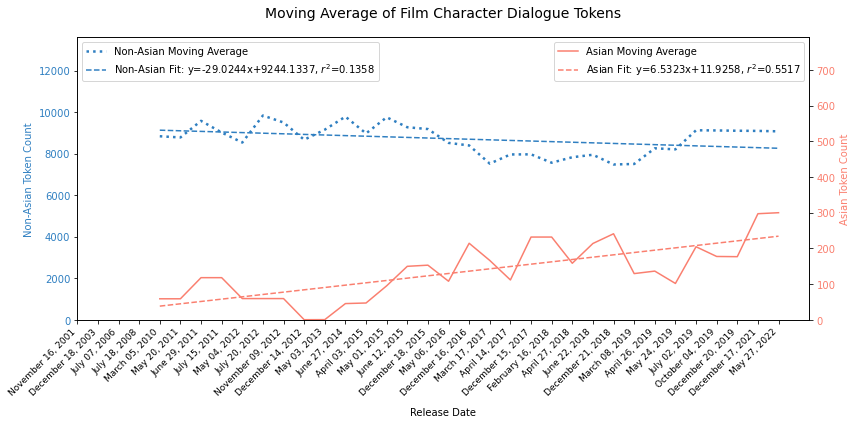

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel('Token.xlsx')
df['Time'] = pd.to_datetime(df['Time'], format='%B %d, %Y')

# Make sure your df is sorted by Time
df = df.sort_values('Time')

# 'date' column is your date data
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)

# Your x-axis values will now be an array of integers from 0 to the length of your dataframe
x_values = np.arange(len(df))

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(fontsize=9)

# left y-axis
ax1.set_xlabel('Release Date', labelpad=10)
ax1.set_ylabel('Non-Asian Token Count', color='#2f7fc1')
ax1.tick_params(axis='y', labelcolor='#2f7fc1')

# right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Asian Token Count', color='#fa7f6f')
ax2.tick_params(axis='y', labelcolor='#fa7f6f')

# Calculate moving averages
window_size = 5  # Change this value as needed
df['Asian_MA'] = df['Asian'].rolling(window=window_size).mean()
df['Non-Asian_MA'] = df['Non-Asian'].rolling(window=window_size).mean()

# Plot moving averages
ax1.plot(x_values, df['Non-Asian_MA'], label='Non-Asian Moving Average', color='#2f7fc1',linestyle=':', linewidth=2.5)
ax2.plot(x_values, df['Asian_MA'], label='Asian Moving Average', color='#fa7f6f', linestyle='-')

# Perform linear regression on moving averages
non_asian_slope, non_asian_intercept, non_asian_r_value, _, _ = stats.linregress(x_values[window_size - 1:], df['Non-Asian_MA'].dropna())
asian_slope, asian_intercept, asian_r_value, _, _ = stats.linregress(x_values[window_size - 1:], df['Asian_MA'].dropna())

# Add linear regression lines of moving averages to the plot
non_asian_line = ax1.plot(x_values[window_size - 1:], non_asian_slope*x_values[window_size - 1:] + non_asian_intercept, label=f'Non-Asian Fit: y={non_asian_slope:.4f}x+{non_asian_intercept:.4f}, $r^2$={non_asian_r_value**2:.4f}', color='#2f7fc1', linestyle='--')
asian_line = ax2.plot(x_values[window_size - 1:], asian_slope*x_values[window_size - 1:] + asian_intercept, label=f'Asian Fit: y={asian_slope:.4f}x+{asian_intercept:.4f}, $r^2$={asian_r_value**2:.4f}', color='#fa7f6f', linestyle='--')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Determine the range for the dialogue length
non_asian_range = (0, df['Non-Asian'].max() * 1.0)
asian_range = (0, df['Asian'].max() * 1.0)

# Set the range for the y-axis
ax1.set_ylim(non_asian_range)
ax2.set_ylim(asian_range)

# Now, set your x-ticks and x-ticklabels to be the index and date
ax1.set_xticks(x_values)
ax1.set_xticklabels(df['Time'].dt.strftime('%B %d, %Y'), rotation=45, ha='right')

# Add a title
plt.title('Moving Average of Film Character Dialogue Tokens', pad=20, fontsize=14)

# Show the plot
plt.tight_layout()

plt.savefig("Tokens_Moving Average of Film Character Dialogue Tokens.png")

plt.show()

#  Sentiment analysis  情感分析

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dorothyhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dorothyhan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<AxesSubplot:>

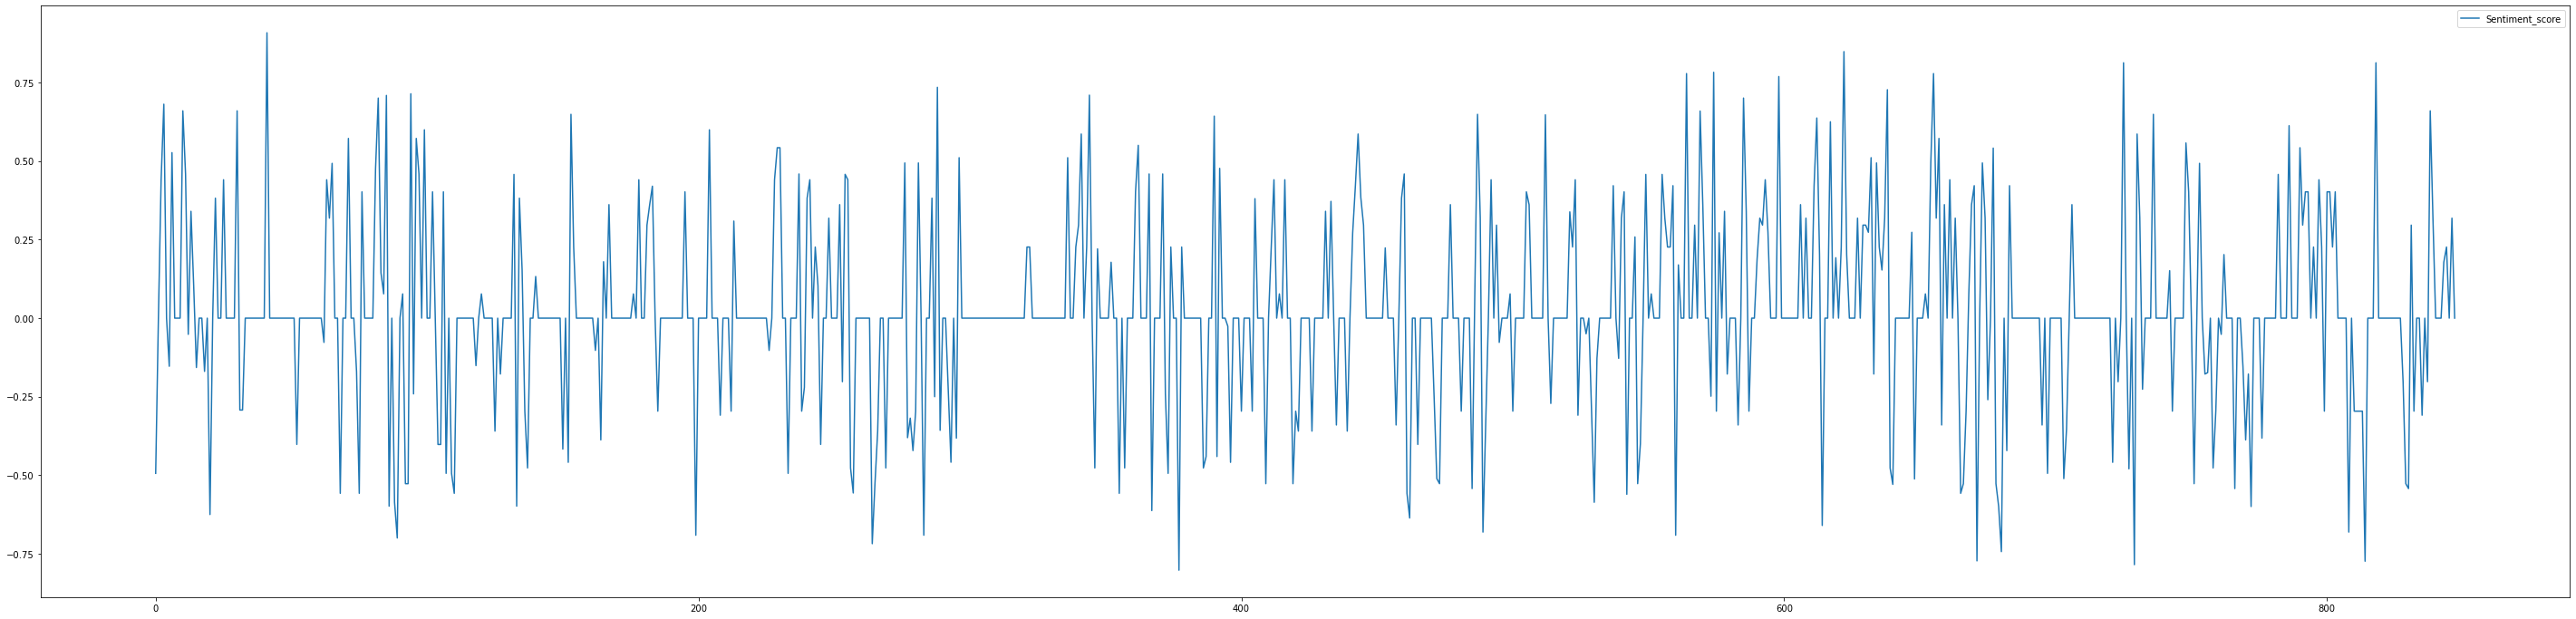

In [11]:
with open ("Asian_high gross film.txt", "r") as f:
    text = f.read().replace("\n", " ")
    
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

sentences = list(doc.sents)


# list
new_sentences = []

for sentence in sentences:
    new_sentences.append(str(sentence))
    
new_sentences


df2 = pd.DataFrame()

df2["sentences"] = new_sentences
df2

score_list2 = []

for sentence in new_sentences:
    score_list2.append(sid.polarity_scores(sentence)['compound'])

score_list2

df2["Sentiment_score"] = score_list2
df2

# Too much text, adjusted the width of the chart to 50
df2.plot(figsize=(50, 12))

In [12]:
# 计算情感分数大于0、小于0或等于0的句子数量
positive_count1 = df2[df2["Sentiment_score"] > 0].shape[0]
negative_count1 = df2[df2["Sentiment_score"] < 0].shape[0]
neutral_count1 = df2[df2["Sentiment_score"] == 0].shape[0]

print(f"Number of positive sentences: {positive_count1}")
print(f"Number of negative sentences: {negative_count1}")
print(f"Number of neutral sentences: {neutral_count1}")

Number of positive sentences: 201
Number of negative sentences: 160
Number of neutral sentences: 487


In [13]:
len(new_sentences)

848

    word  Sentiment_score
0     As              0.0
1    you              0.0
2    all              0.0
3  aware              0.0
4    one              0.0


<AxesSubplot:title={'center':'Sentiment Scores for Words in Asian Character Dialogues'}>

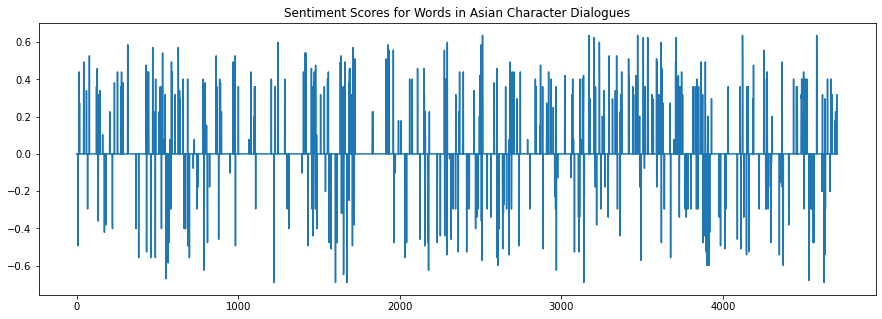

In [14]:
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Load Spacy English Model
nlp = spacy.load("en_core_web_sm")

# Open and read the text file
with open("Asian_high gross film.txt", "r") as f:
    text = f.read().replace("\n", " ")

# Process the text with Spacy
doc = nlp(text)

# Extract words from the text (only keeping alphabetic words and ignoring punctuation)
words = [token.text for token in doc if token.is_alpha]

# Create a DataFrame to store words and their sentiment scores
df_words = pd.DataFrame()
df_words["word"] = words

# Calculate the sentiment score for each word
score_list_words = [sid.polarity_scores(word)['compound'] for word in words]

# Add the sentiment scores to the DataFrame
df_words["Sentiment_score"] = score_list_words

# Print the first few rows to check the results
print(df_words.head())

# Visualize the sentiment scores
df_words["Sentiment_score"].plot(figsize=(15, 5), title="Sentiment Scores for Words in Asian Character Dialogues")

In [15]:
positive_count = df_words[df_words["Sentiment_score"] > 0].shape[0]
negative_count = df_words[df_words["Sentiment_score"] < 0].shape[0]
neutral_count = df_words[df_words["Sentiment_score"] == 0].shape[0]

print(f"Number of positive words: {positive_count}")
print(f"Number of negative words: {negative_count}")
print(f"Number of neutral words: {neutral_count}")

Number of positive words: 267
Number of negative words: 190
Number of neutral words: 4253


In [16]:
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

sid = SentimentIntensityAnalyzer()

nlp = spacy.load("en_core_web_sm")

with open("Asian_high gross film.txt", "r") as f:
    text = f.read().replace("\n", " ")

doc = nlp(text)

words = [token.text.lower() for token in doc if token.is_alpha]

df_words = pd.DataFrame()
df_words["word"] = words

score_list_words = [sid.polarity_scores(word)['compound'] for word in words]

df_words["Sentiment_score"] = score_list_words

df_words = df_words.drop_duplicates(subset="word")

sorted_df = df_words.sort_values(by="Sentiment_score", ascending=False)

top_words = sorted_df.head(15)
bottom_words = sorted_df.tail(15)

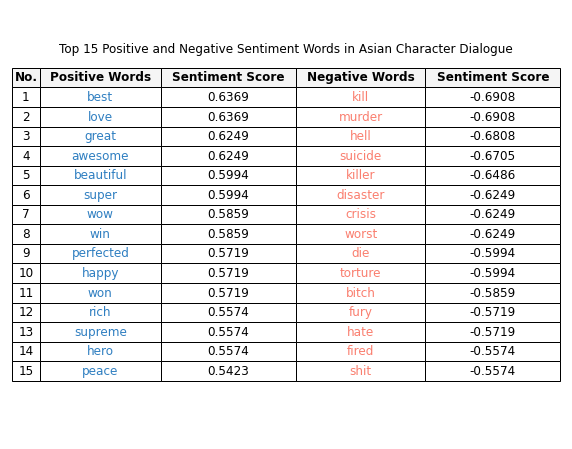

In [17]:
# 绘制表格
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

cols = ['No.', 'Positive Words', 'Sentiment Score', 'Negative Words', 'Sentiment Score']
rows = []

# 添加序号列并组装行数据
for i, (pos_row, neg_row) in enumerate(zip(top_words.iterrows(), bottom_words.iloc[::-1].iterrows())):
    _, pos_data = pos_row
    _, neg_data = neg_row
    rows.append([i+1, pos_data['word'], pos_data['Sentiment_score'], neg_data['word'], neg_data['Sentiment_score']])

table = ax.table(cellText=rows, colLabels=cols, cellLoc='center', loc='center')

# 设置单元格的颜色和字体
for (i, j), cell in table.get_celld().items():
    if j in [2, 4]:
        cell.set_text_props(color='black')
    if j in [1]:
        cell.set_text_props(color='#2f7fc1')
    if j in [3]:
        cell.set_text_props(color='#fa7f6f')
    if i == 0:  # header cells
        cell.set_facecolor('#f5f5f5')
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='black')
    else:
        cell.set_fontsize(12)

# 设置行高
cellDict = table.get_celld()
for i in range(0, len(rows) + 1):
    cellDict[(i, 0)].set_height(.03)
    for j in range(1, len(cols)):
        cellDict[(i, j)].set_height(.03)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(5)))  # Set column width automatically
table.scale(1.2, 1.5)  # Adjust the scale for better spacing

# Adjust the title position to be closer to the table and above it
plt.title("Top 15 Positive and Negative Sentiment Words in Asian Character Dialogue", fontsize=12, y=0.88)
plt.savefig("Top 15 Positive and Negative Sentiment Words in Asian Character Dialogue.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [18]:
len(words)

4710

## TextBlob

In [19]:
from textblob import TextBlob

with open("Asian_high gross film.txt", "r") as f:
    text = f.read().replace("\n", " ")

import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
sentences = [str(sentence) for sentence in doc.sents]

# 使用TextBlob进行情感分析
polarity_scores = []
for sentence in sentences:
    blob = TextBlob(sentence)
    polarity_scores.append(blob.sentiment.polarity)

# 对句子进行分类
sentiments = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in polarity_scores]

import pandas as pd
df = pd.DataFrame()
df['sentences'] = sentences
df['polarity'] = polarity_scores
df['sentiment'] = sentiments

# 统计每种情感的数量
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

neutral     601
positive    160
negative     87
Name: sentiment, dtype: int64


In [20]:
from textblob import TextBlob

# 使用Spacy进行分词
doc = nlp(text)

# 提取文本中的单词（仅保留字母词，忽略标点符号等）
words = [token.text for token in doc if token.is_alpha]

# 创建一个DataFrame存储单词及其情感分数
df_words_textblob = pd.DataFrame()
df_words_textblob["word"] = words

# 使用TextBlob计算每个单词的情感
def classify_sentiment(word):
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

# 将情感分类添加到DataFrame
df_words_textblob["Sentiment"] = df_words_textblob["word"].apply(classify_sentiment)

# 计算正面、负面和中性词汇的数量
positive_count = len(df_words_textblob[df_words_textblob["Sentiment"] == "positive"])
negative_count = len(df_words_textblob[df_words_textblob["Sentiment"] == "negative"])
neutral_count = len(df_words_textblob[df_words_textblob["Sentiment"] == "neutral"])

print(f"Positive words count: {positive_count}")
print(f"Negative words count: {negative_count}")
print(f"Neutral words count: {neutral_count}")

Positive words count: 204
Negative words count: 108
Neutral words count: 4398


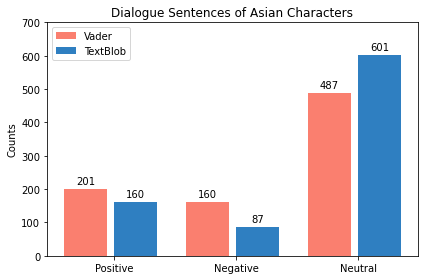

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 给定数据
labels = ['Positive', 'Negative', 'Neutral']
vader_data = [201, 160, 487]
textblob_data = [160, 87, 601]

x = np.arange(len(labels))  # label位置
width = 0.35  # 条形的宽度

fig, ax = plt.subplots()

# 使用不同颜色创建柱状图
rects1 = ax.bar(x - width/1.5, vader_data, width, label='Vader', color='#fa7f6f')
rects2 = ax.bar(x + width/2, textblob_data, width, label='TextBlob', color='#2f7fc1')

# 设置标签、标题和图例
ax.set_ylabel('Counts')
ax.set_title('Dialogue Sentences of Asian Characters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 700)
ax.legend()

# 自动设置每个条形的标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("Dialogue Sentences of Asian Characters.png")
plt.show()

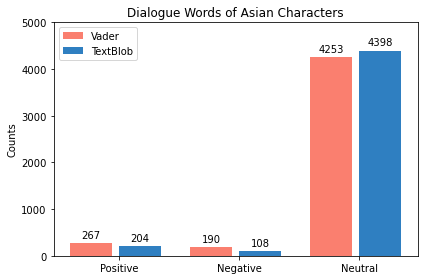

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 给定数据
labels = ['Positive', 'Negative', 'Neutral']
vader_data = [267, 190, 4253]
textblob_data = [204, 108, 4398]

x = np.arange(len(labels))  # label位置
width = 0.35  # 条形的宽度

fig, ax = plt.subplots()

# 使用不同颜色创建柱状图
rects1 = ax.bar(x - width/1.5, vader_data, width, label='Vader', color='#fa7f6f')
rects2 = ax.bar(x + width/2, textblob_data, width, label='TextBlob', color='#2f7fc1')

# 设置标签、标题和图例
ax.set_ylabel('Counts')
ax.set_title('Dialogue Words of Asian Characters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 5000)
ax.legend()

# 自动设置每个条形的标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("Dialogue Words of Asian Characters.png")
plt.show()

## non asian

<AxesSubplot:>

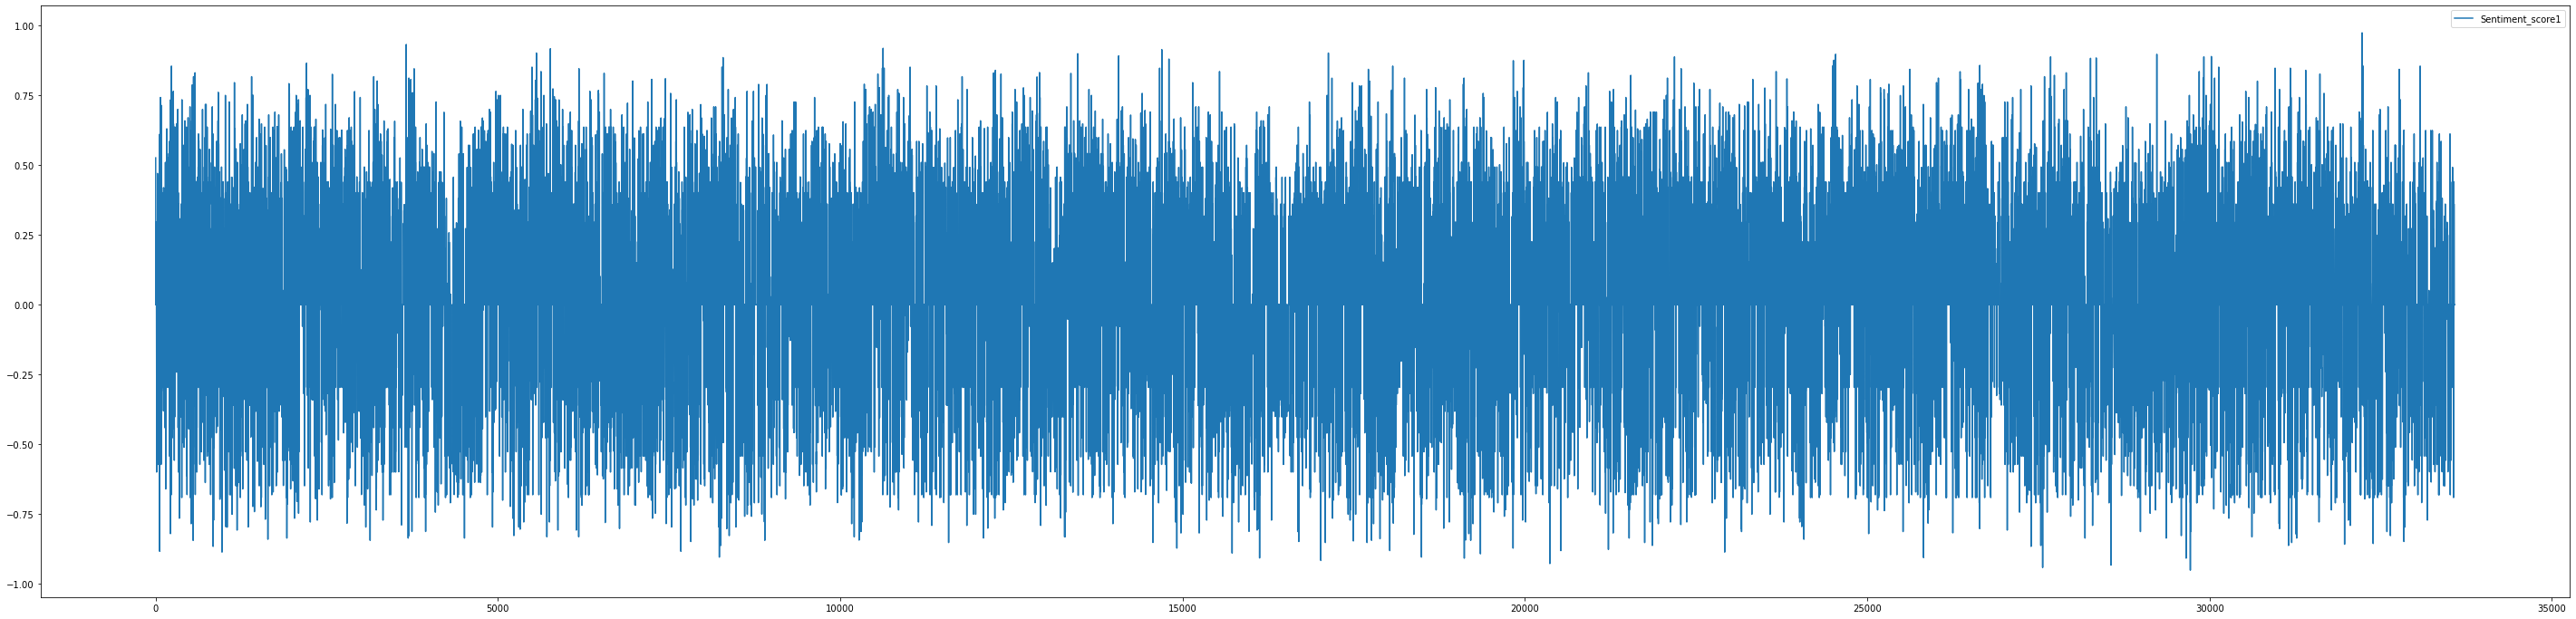

In [23]:
with open ("only_non-Asian_high gross film.txt", "r") as f:
    text1 = f.read().replace("\n", " ")
    
import spacy
nlp = spacy.load("en_core_web_sm")

doc1 = nlp(text1)

sentences1 = list(doc1.sents)


# list

new_sentences1 = []

for sentence1 in sentences1:
    new_sentences1.append(str(sentence1))
    
new_sentences1

len(new_sentences1)


df3 = pd.DataFrame()

df3["sentences"] = new_sentences1
df3

score_list3 = []

for sentence1 in new_sentences1:
    score_list3.append(sid.polarity_scores(sentence1)['compound'])

score_list3

df3["Sentiment_score1"] = score_list3
df3

df3.plot(figsize=(50, 12))

In [24]:
# 计算情感分数大于0、小于0或等于0的句子数量
positive_count1 = df3[df3["Sentiment_score1"] > 0].shape[0]
negative_count1 = df3[df3["Sentiment_score1"] < 0].shape[0]
neutral_count1 = df3[df3["Sentiment_score1"] == 0].shape[0]

print(f"Number of positive sentences: {positive_count1}")
print(f"Number of negative sentences: {negative_count1}")
print(f"Number of neutral sentences: {neutral_count1}")

Number of positive sentences: 7740
Number of negative sentences: 5831
Number of neutral sentences: 20010


In [25]:
len(sentences1)

33581

    word  Sentiment_score
0  Three           0.0000
1     of           0.0000
2      a           0.0000
3   kind           0.5267
4    let           0.0000


<AxesSubplot:title={'center':'Word Sentiment Scores'}>

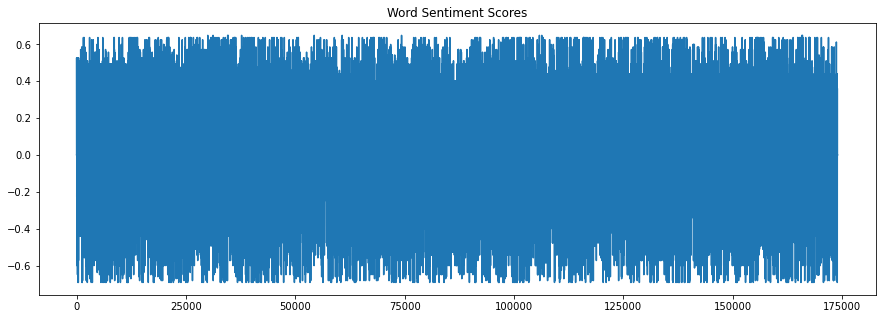

In [26]:
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# 初始化情感分析器
sid = SentimentIntensityAnalyzer()

# 加载Spacy的英文模型
nlp = spacy.load("en_core_web_sm")

# 读取文件内容
with open("only_non-Asian_high gross film.txt", "r") as f:
    text = f.read().replace("\n", " ")

# 使用Spacy分词
doc = nlp(text)

# 提取文本中的单词（仅保留字母词，忽略标点符号等）
words1 = [token.text for token in doc if token.is_alpha]

# 创建一个DataFrame存储单词及其情感分数
df_words = pd.DataFrame()
df_words["word"] = words1

# 计算每个单词的情感分数
score_list_words = [sid.polarity_scores(word)['compound'] for word in words1]

# 将情感分数添加到DataFrame
df_words["Sentiment_score"] = score_list_words

# 打印前几行数据以检查结果
print(df_words.head())

# 可视化情感分数
df_words["Sentiment_score"].plot(figsize=(15, 5), title="Word Sentiment Scores")


In [27]:
# 计算情感分数大于0、小于0或等于0的单词数量
positive_count = df_words[df_words["Sentiment_score"] > 0].shape[0]
negative_count = df_words[df_words["Sentiment_score"] < 0].shape[0]
neutral_count = df_words[df_words["Sentiment_score"] == 0].shape[0]

print(f"Number of positive words: {positive_count}")
print(f"Number of negative words: {negative_count}")
print(f"Number of neutral words: {neutral_count}")

Number of positive words: 9735
Number of negative words: 7391
Number of neutral words: 156840


In [28]:
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# 初始化情感分析器
sid = SentimentIntensityAnalyzer()

# 加载Spacy的英文模型
nlp = spacy.load("en_core_web_sm")

# 读取文件内容
with open("only_non-Asian_high gross film.txt", "r") as f:
    text2 = f.read().replace("\n", " ")

# 使用Spacy分词
doc = nlp(text2)

# 提取文本中的单词（仅保留字母词，忽略标点符号等）
words2 = [token.text.lower() for token in doc if token.is_alpha]

# 创建一个DataFrame存储单词及其情感分数
df_words = pd.DataFrame()
df_words["word"] = words2

# 计算每个单词的情感分数
score_list_words2 = [sid.polarity_scores(word)['compound'] for word in words2]

# 将情感分数添加到DataFrame
df_words["Sentiment_score"] = score_list_words2

# 去除重复的单词（基于小写）
df_words = df_words.drop_duplicates(subset="word")

# 根据情感分数对数据进行排序
sorted_df = df_words.sort_values(by="Sentiment_score", ascending=False)

# 获取情感分数最高的前15个单词和最低的15个单词
top_words = sorted_df.head(15)
bottom_words = sorted_df.tail(15)

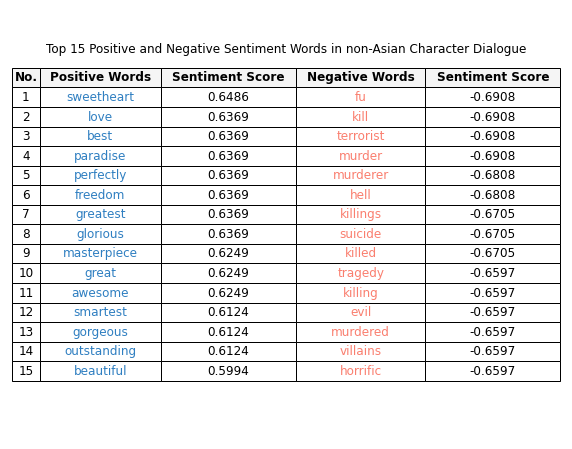

In [29]:
# 绘制表格
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

cols = ['No.', 'Positive Words', 'Sentiment Score', 'Negative Words', 'Sentiment Score']
rows = []

# 添加序号列并组装行数据
for i, (pos_row, neg_row) in enumerate(zip(top_words.iterrows(), bottom_words.iloc[::-1].iterrows())):
    _, pos_data = pos_row
    _, neg_data = neg_row
    rows.append([i+1, pos_data['word'], pos_data['Sentiment_score'], neg_data['word'], neg_data['Sentiment_score']])

table = ax.table(cellText=rows, colLabels=cols, cellLoc='center', loc='center')

# 设置单元格的颜色和字体
for (i, j), cell in table.get_celld().items():
    if j in [2, 4]:
        cell.set_text_props(color='black')
    if j in [1]:
        cell.set_text_props(color='#2f7fc1')
    if j in [3]:
        cell.set_text_props(color='#fa7f6f')
    if i == 0:  # header cells
        cell.set_facecolor('#f5f5f5')
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold', color='black')
    else:
        cell.set_fontsize(12)

# 设置行高
cellDict = table.get_celld()
for i in range(0, len(rows) + 1):
    cellDict[(i, 0)].set_height(.03)
    for j in range(1, len(cols)):
        cellDict[(i, j)].set_height(.03)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(5)))  # Set column width automatically
table.scale(1.2, 1.5)  # Adjust the scale for better spacing

# Adjust the title position to be closer to the table and above it
plt.title("Top 15 Positive and Negative Sentiment Words in non-Asian Character Dialogue", fontsize=12, y=0.88)
plt.savefig("Top 15 Positive and Negative Sentiment Words in non-Asian Character Dialogue.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [30]:
len(words2)

173966

In [31]:
from textblob import TextBlob

with open("only_non-Asian_high gross film.txt", "r") as f:
    text_texblob2 = f.read().replace("\n", " ")

import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_texblob2)
sentences = [str(sentence) for sentence in doc.sents]

# 使用TextBlob进行情感分析
polarity_scores = []
for sentence in sentences:
    blob = TextBlob(sentence)
    polarity_scores.append(blob.sentiment.polarity)

# 对句子进行分类
sentiments = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in polarity_scores]

import pandas as pd
df = pd.DataFrame()
df['sentences'] = sentences
df['polarity'] = polarity_scores
df['sentiment'] = sentiments

# 统计每种情感的数量
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

neutral     24379
positive     5979
negative     3223
Name: sentiment, dtype: int64


In [32]:
from textblob import TextBlob

# 使用Spacy进行分词
doc = nlp(text_texblob2)

# 提取文本中的单词（仅保留字母词，忽略标点符号等）
words = [token.text for token in doc if token.is_alpha]

# 创建一个DataFrame存储单词及其情感分数
df_words_textblob = pd.DataFrame()
df_words_textblob["word"] = words

# 使用TextBlob计算每个单词的情感
def classify_sentiment(word):
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

# 将情感分类添加到DataFrame
df_words_textblob["Sentiment"] = df_words_textblob["word"].apply(classify_sentiment)

# 计算正面、负面和中性词汇的数量
positive_count = len(df_words_textblob[df_words_textblob["Sentiment"] == "positive"])
negative_count = len(df_words_textblob[df_words_textblob["Sentiment"] == "negative"])
neutral_count = len(df_words_textblob[df_words_textblob["Sentiment"] == "neutral"])

print(f"Positive words count: {positive_count}")
print(f"Negative words count: {negative_count}")
print(f"Neutral words count: {neutral_count}")

Positive words count: 7301
Negative words count: 3857
Neutral words count: 162808


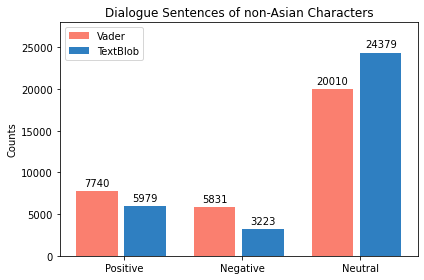

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# 给定数据
labels = ['Positive', 'Negative', 'Neutral']
vader_data = [7740, 5831, 20010]
textblob_data = [5979, 3223, 24379]

x = np.arange(len(labels))  # label位置
width = 0.35  # 条形的宽度

fig, ax = plt.subplots()

# 使用不同颜色创建柱状图
rects1 = ax.bar(x - width/1.5, vader_data, width, label='Vader', color='#fa7f6f')
rects2 = ax.bar(x + width/2, textblob_data, width, label='TextBlob', color='#2f7fc1')

# 设置标签、标题和图例
ax.set_ylabel('Counts')
ax.set_title('Dialogue Sentences of non-Asian Characters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 28000)
ax.legend()

# 自动设置每个条形的标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("Dialogue Sentences of non-Asian Characters.png")
plt.show()

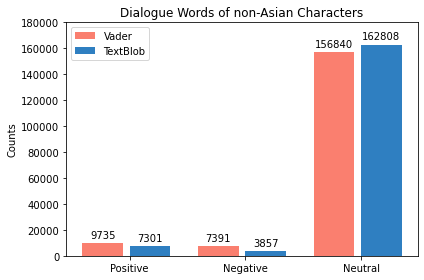

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 给定数据
labels = ['Positive', 'Negative', 'Neutral']
vader_data = [9735, 7391, 156840]
textblob_data = [7301, 3857, 162808]

x = np.arange(len(labels))  # label位置
width = 0.35  # 条形的宽度

fig, ax = plt.subplots()

# 使用不同颜色创建柱状图
rects1 = ax.bar(x - width/1.5, vader_data, width, label='Vader', color='#fa7f6f')
rects2 = ax.bar(x + width/2, textblob_data, width, label='TextBlob', color='#2f7fc1')

# 设置标签、标题和图例
ax.set_ylabel('Counts')
ax.set_title('Dialogue Words of non-Asian Characters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 180000)
ax.legend()

# 自动设置每个条形的标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("Dialogue Words of non-Asian Characters.png")
plt.show()

In [35]:
pip show vaderSentiment

Name: vaderSentiment
Version: 3.3.2
Summary: VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.
Home-page: https://github.com/cjhutto/vaderSentiment
Author: C.J. Hutto
Author-email: cjhutto@gatech.edu
License: MIT License
Location: /Users/dorothyhan/opt/anaconda3/lib/python3.9/site-packages
Requires: requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [36]:
import textblob
print("TextBlob Version:", textblob.__version__)

TextBlob Version: 0.17.1


## 词汇丰富度

In [37]:
!pip install lexical_diversity

In [38]:
import spacy
from lexical_diversity import lex_div as ld

# 加载英文模型
nlp = spacy.load("en_core_web_sm")

# 文本加载函数
def load_text(filename):
    with open(filename, "r") as f:
        return f.read()

# 获取词汇丰富度(TTR)的函数
def type_token_ratio(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.is_alpha]
    types = set(tokens)
    
    return len(types) / len(tokens) if tokens else 0

asian_text = load_text("Asian_high gross film.txt")
non_asian_text = load_text("only_non-Asian_high gross film.txt")

# 获取TTR
asian_ttr = type_token_ratio(asian_text)
non_asian_ttr = type_token_ratio(non_asian_text)

# 获取MTLD
asian_mtld = ld.mtld(asian_text.split())  # MTLD要求传入单词列表
non_asian_mtld = ld.mtld(non_asian_text.split())

print(f"TTR for Asian Characters: {asian_ttr:.4f}")
print(f"TTR for Non-Asian Characters: {non_asian_ttr:.4f}")
print(f"MTLD for Asian Characters: {asian_mtld:.4f}")
print(f"MTLD for Non-Asian Characters: {non_asian_mtld:.4f}")


TTR for Asian Characters: 0.2703
TTR for Non-Asian Characters: 0.0559
MTLD for Asian Characters: 139.2920
MTLD for Non-Asian Characters: 196.3608


10 Most Common Words: [('the', 215), ('you', 171), ('i', 169), ('to', 100), ('a', 97), ('it', 88), ('we', 87), ('is', 75), ('of', 69), ('with', 66)]


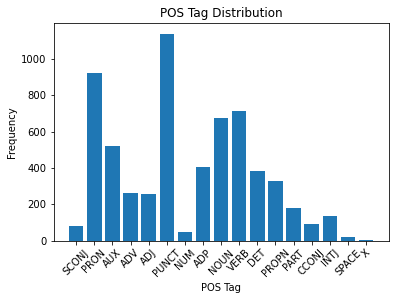

10 Most Common Entities: [('Force', 34), ('Peter', 16), ('Finn', 8), ('Hong Kong', 4), ('Peter Parker', 4), ('one', 3), ('today', 3), ('One', 3), ('first', 3), ('Atlantean', 3)]


In [39]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# 加载英文模型
nlp = spacy.load("en_core_web_sm")

# 读取文本
with open("Asian_high gross film.txt", "r") as f:
    asian_text = f.read().replace("\n", " ")

# 使用spacy进行处理
doc = nlp(asian_text)

# 1. 词频分析
word_freq = Counter([token.text.lower() for token in doc if token.is_alpha])
common_words = word_freq.most_common(10)
print(f"10 Most Common Words: {common_words}")

# 2. 词性标注分析
pos_counts = Counter([token.pos_ for token in doc])
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# 3. 实体识别
entities = [ent.text for ent in doc.ents]
entity_freq = Counter(entities)
common_entities = entity_freq.most_common(10)
print(f"10 Most Common Entities: {common_entities}")



10 Most Common Words: [('you', 7695), ('i', 6532), ('the', 5980), ('to', 3843), ('it', 3634), ('a', 3260), ('that', 2697), ('we', 2615), ('and', 2079), ('is', 2074)]


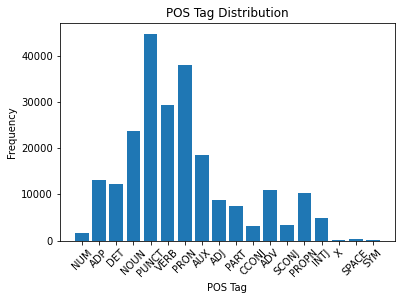

10 Most Common Entities: [('one', 171), ('Peter', 132), ('two', 118), ('first', 111), ('Rey', 96), ('One', 77), ('Stark', 76), ('Tony', 73), ('Finn', 61), ('second', 54)]


In [40]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# 加载英文模型
nlp = spacy.load("en_core_web_sm")

# 读取文本
with open("only_non-Asian_high gross film.txt", "r") as f:
    asian_text = f.read().replace("\n", " ")

# 使用spacy进行处理
doc = nlp(asian_text)

# 1. 词频分析
word_freq = Counter([token.text.lower() for token in doc if token.is_alpha])
common_words = word_freq.most_common(10)
print(f"10 Most Common Words: {common_words}")

# 2. 词性标注分析
pos_counts = Counter([token.pos_ for token in doc])
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# 3. 实体识别
entities = [ent.text for ent in doc.ents]
entity_freq = Counter(entities)
common_entities = entity_freq.most_common(10)
print(f"10 Most Common Entities: {common_entities}")



## 句法结构分析  Syntactic Structure

Average sentence length for Asian Characters: 7.27


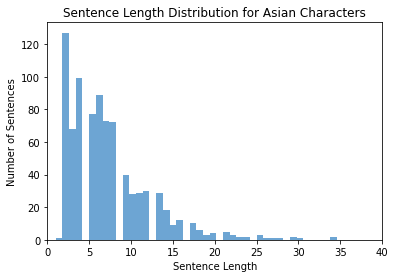

Number of declarative sentences: 590
Number of interrogative sentences: 138
Number of exclamatory sentences: 109
Number of other sentences: 11
SVO: one - stolen - deposits
SVO: police - seize - funds
SVO: A - Moving - location
SVO: one - know - me
SVO: police - gain - stake
SVO: I - extradite - own
SVO: I - wait - permission


In [41]:
import spacy
import matplotlib.pyplot as plt

# 加载英文模型
nlp = spacy.load("en_core_web_sm")

# 读取文本
with open("Asian_high gross film.txt", "r") as f:
    asian_text = f.read().replace("\n", " ")

# 使用spacy进行处理
doc = nlp(asian_text)

# 1. 句子长度分析
sentence_lengths = [len(sent) for sent in doc.sents]
avg_sentence_length = sum(sentence_lengths) / len(sentence_lengths)

print(f"Average sentence length for Asian Characters: {avg_sentence_length:.2f}")
plt.hist(sentence_lengths, bins=50, facecolor="#2f7fc1", alpha=0.7)
plt.title("Sentence Length Distribution for Asian Characters")
plt.xlabel("Sentence Length")
plt.xticks(range(0, 41, 5))
plt.xlim(0, 40) 
plt.ylabel("Number of Sentences")
plt.savefig("Sentence Length Distribution for Asian Characters.png") 
plt.show()

# 2. 句子类型分析
declarative_sentences = 0
interrogative_sentences = 0
exclamatory_sentences = 0
other_sentences = 0

for sent in doc.sents:
    text = sent.text.strip()
    if len(text) == 0:  # Skip empty sentences
        continue
    if text[-1] == ".":
        declarative_sentences += 1
    elif text[-1] == "?":
        interrogative_sentences += 1
    elif text[-1] == "!":
        exclamatory_sentences += 1
    else:
        other_sentences += 1

print(f"Number of declarative sentences: {declarative_sentences}")
print(f"Number of interrogative sentences: {interrogative_sentences}")
print(f"Number of exclamatory sentences: {exclamatory_sentences}")
print(f"Number of other sentences: {other_sentences}")

# 3. 依存关系分析 - Due to the complexity, we will show a simple example
# Extracting subject-verb-object (SVO) triples can be one approach

for sent in list(doc.sents)[:10]:  # We limit to first 10 sentences for simplicity
    subject = ""
    verb = ""
    obj = ""
    for token in sent:
        if "subj" in token.dep_:
            subject = token.text
        if "VERB" in token.pos_:
            verb = token.text
        if "obj" in token.dep_:
            obj = token.text
    if subject and verb and obj:
        print(f"SVO: {subject} - {verb} - {obj}")

In [42]:
# 使用spacy处理文本
doc = nlp(asian_text)

# 计算句子的数量
num_sentences = len(list(doc.sents))
print(f"Number of sentences in the text: {num_sentences}")

Number of sentences in the text: 848


Average sentence length for non-Asian Characters: 6.88


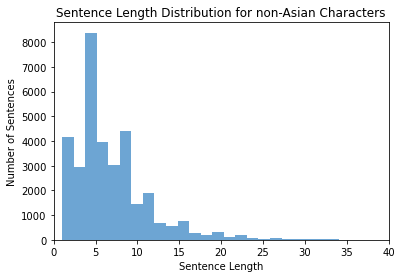

Number of declarative sentences: 23931
Number of interrogative sentences: 5426
Number of exclamatory sentences: 3842
Number of other sentences: 382
SVO: 's - do - this
SVO: guy - gets - share
SVO: who - planned - job
SVO: he - take - slice
SVO: they - call - him


In [43]:
import spacy
import matplotlib.pyplot as plt

# 加载英文模型
nlp = spacy.load("en_core_web_sm")

# 读取文本
with open("only_non-Asian_high gross film.txt", "r") as f:
    non_asian_text = f.read().replace("\n", " ")

# 使用spacy进行处理
doc = nlp(non_asian_text)

# 1. 句子长度分析
sentence_lengths = [len(sent) for sent in doc.sents]
avg_sentence_length = sum(sentence_lengths) / len(sentence_lengths)

print(f"Average sentence length for non-Asian Characters: {avg_sentence_length:.2f}")
plt.hist(sentence_lengths, bins=50, facecolor="#2f7fc1", alpha=0.7)
plt.title("Sentence Length Distribution for non-Asian Characters")
plt.xlabel("Sentence Length")
plt.xticks(range(0, 41, 5))
plt.xlim(0, 40) 
plt.ylabel("Number of Sentences")
plt.savefig("Sentence Length Distribution for non-Asian Characters.png") 
plt.show()

# 2. 句子类型分析
declarative_sentences = 0
interrogative_sentences = 0
exclamatory_sentences = 0
other_sentences = 0

for sent in doc.sents:
    text = sent.text.strip()
    if len(text) == 0:  # Skip empty sentences
        continue
    if text[-1] == ".":
        declarative_sentences += 1
    elif text[-1] == "?":
        interrogative_sentences += 1
    elif text[-1] == "!":
        exclamatory_sentences += 1
    else:
        other_sentences += 1

print(f"Number of declarative sentences: {declarative_sentences}")
print(f"Number of interrogative sentences: {interrogative_sentences}")
print(f"Number of exclamatory sentences: {exclamatory_sentences}")
print(f"Number of other sentences: {other_sentences}")

# 3. 依存关系分析 - Due to the complexity, we will show a simple example
# Extracting subject-verb-object (SVO) triples can be one approach

for sent in list(doc.sents)[:10]:  # We limit to first 10 sentences for simplicity
    subject = ""
    verb = ""
    obj = ""
    for token in sent:
        if "subj" in token.dep_:
            subject = token.text
        if "VERB" in token.pos_:
            verb = token.text
        if "obj" in token.dep_:
            obj = token.text
    if subject and verb and obj:
        print(f"SVO: {subject} - {verb} - {obj}")

In [44]:
import spacy
import random
import numpy as np

# 加载英文模型
nlp = spacy.load("en_core_web_sm")

# 读取文本
with open("Asian_high gross film.txt", "r") as f:
    asian_text = f.read().replace("\n", " ")

with open("only_non-Asian_high gross film.txt", "r") as f:
    non_asian_text = f.read().replace("\n", " ")

# 使用spacy进行处理
asian_doc = nlp(asian_text)
non_asian_doc = nlp(non_asian_text)

# 获取句子长度
asian_sentence_lengths = [len(sent) for sent in asian_doc.sents]
non_asian_sentence_lengths = [len(sent) for sent in non_asian_doc.sents]

# 从非亚裔数据集中随机抽样
sampled_non_asian_sentence_lengths = random.sample(non_asian_sentence_lengths, len(asian_sentence_lengths))

# 计算中位数
asian_median_length = np.median(asian_sentence_lengths)
sampled_non_asian_median_length = np.median(sampled_non_asian_sentence_lengths)

print(f"Median sentence length for Asian roles: {asian_median_length:.2f}")
print(f"Median sentence length for non-Asian roles (sampled): {sampled_non_asian_median_length:.2f}")


Median sentence length for Asian roles: 6.00
Median sentence length for non-Asian roles (sampled): 6.00
